In [1]:
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm import geneticalgorithm as ga
import sys
import os
from contextlib import redirect_stdout
import io

# Add the src folder to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))

import mesh
import geometry
import material
from stress_strain_analysis import stress_strain_analysis

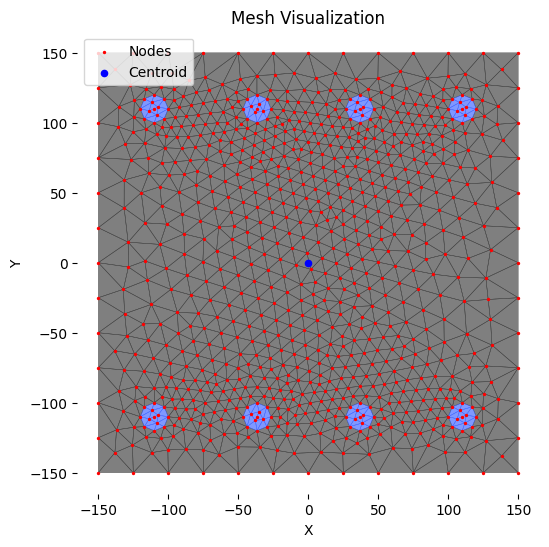

In [2]:
ReinforcedConcrete = geometry.ReinforcedConcreteColumn(width  = 300, 
                                                       height = 300, 
                                                       concrete_cover = 30,
                                                       rebar_diameter = 20,
                                                       rebar_spacing  = 50)
Mesh = mesh.Mesh(ReinforcedConcrete, "triangle", 25)
Mesh.plot()

In [3]:
Analysis = stress_strain_analysis(Mesh, Nx=0, My=100)

In [ ]:
varbound=np.array([[- 0.001,  0.001],
                   [-0.0001, 0.0001]])

size = [i * 100 for i in range(1,11) for _ in range(2)]
print(size)
O = []

for s in size:
    algorithm_param = {'max_num_iteration': s,\
                   'population_size':20,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

    model=ga(function=Analysis.find_strain_and_curvature,
            dimension=2,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param)

    model.run()
    O.append(model.report[-1])

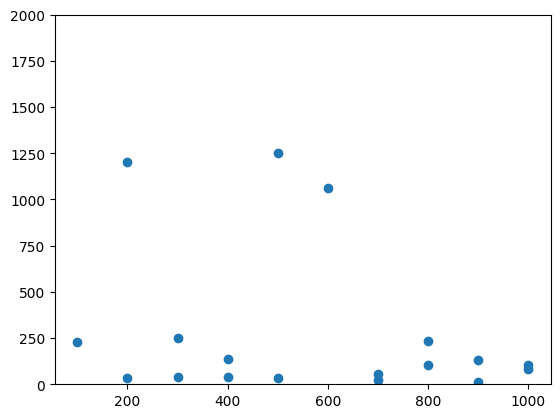

In [5]:
plt.scatter(size, O)
plt.ylim(0, 2000)
plt.show()